In [ ]:
"""
Reading in the dataset
"""

In [ ]:
"""
This article was published as a part of the Data Science Blogathon

Introduction
Exploratory Data Analysis is a set of techniques that were developed by Tukey, John Wilder in 1970. The philosophy behind this approach was to examine the data before building a model. John Tukey encouraged statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. Today Data scientists and analysts spend most of their time in Data Wrangling and Exploratory Data Analysis also known as EDA. But what is this EDA and why it is so important? This article explains what is EDA and how to apply EDA techniques to a dataset.

Table of Contents
1. What is Exploratory Data Analysis?

2. Why EDA is important?

3.How to perform EDA?

4.Endnote

Loading Image
Learn | Write | Earn
Participate and become a part of 800+ data science authors
What is Exploratory Data Analysis?
Exploratory Data Analysis or EDA is used to take insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. Following things are part of EDA :

Get maximum insights from a data set
Uncover underlying structure
Extract important variables from the dataset
Detect outliers and anomalies(if any)
Test underlying assumptions
Determine the optimal factor settings

"""

In [ ]:
"""
Investigation of structure, quality and content
Overall, the EDA approach is very iterative. At the end of your investigation you might discover something that will require you to redo everything once more. That is normal! But to impose at least a little bit of structure, I propose the following structure for your investigations:

Structure investigation: Exploring the general shape of the dataset, as well as the data types of your features.
Quality investigation: Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.
Content investigation: Once the structure and quality of the dataset is understood, we can go ahead and perform a more in-depth exploration on the features values and look at how different features relate to each other.
"""


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv(r"C:\Users\bmthm\Downloads\archive (4)\penguins_size.csv")

In [5]:
df.size

2408

In [6]:
df.shape

(344, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
"""
The dataset consists of 7 columns.

species: penguin species (Chinstrap, Adélie, or Gentoo)
culmen_length_mm: culmen length (mm)
culmen_depth_mm: culmen depth (mm)
flipper_length_mm: flipper length (mm)
body_mass_g: body mass (g)
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex: penguin sex

"""

In [ ]:
###Missing values

In [20]:

miss_val_percent = 100 * df.isnull().sum() /len(df)
miss_val_table = pd.concat([miss_val,miss_val_percent],axis = 1)

In [25]:
missing = missing_values_table(df)

In [26]:
missing

In [29]:
miss_val = df.isnull().sum()
miss_val

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [33]:
miss_val_percent = (100 * df.isnull().sum() /len(df)).round(2)
miss_val_percent

species              0.00
island               0.00
culmen_length_mm     0.58
culmen_depth_mm      0.58
flipper_length_mm    0.58
body_mass_g          0.58
sex                  2.91
dtype: float64

In [39]:
miss_val_table = pd.concat([miss_val,miss_val_percent],axis = 1)
miss_val_table

,0,1
species,0,0.00
island,0,0.00
culmen_length_mm,2,0.58
culmen_depth_mm,2,0.58
flipper_length_mm,2,0.58
body_mass_g,2,0.58
sex,10,2.91


In [62]:
miss_val_table_new = miss_val_table.rename(columns = {0 : 'Missing Values count', 1 : '% of Total Values'})
miss_val_table_new.sort_values("Missing Values count")

,Missing Values count,% of Total Values
species,0,0.00
island,0,0.00
culmen_length_mm,2,0.58
culmen_depth_mm,2,0.58
flipper_length_mm,2,0.58
body_mass_g,2,0.58
sex,10,2.91


In [ ]:
### Handling the missing values

In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'most_frequent')

df.iloc[:,:] = imputer.fit_transform(df)

In [44]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [46]:
df.describe(include='float').round(1)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.0,344.0,344.0,344.0
mean,43.9,17.2,200.9,4199.4
std,5.4,2.0,14.0,800.2
min,32.1,13.1,172.0,2700.0
25%,39.3,15.6,190.0,3550.0
50%,44.2,17.3,197.0,4025.0
75%,48.5,18.7,213.0,4750.0
max,59.6,21.5,231.0,6300.0


In [47]:
df.cov().round(1)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.7,-2.5,50.3,2597.0
culmen_depth_mm,-2.5,3.9,-16.1,-742.7
flipper_length_mm,50.3,-16.1,197.3,9792.6
body_mass_g,2597.0,-742.7,9792.6,640316.7


In [48]:
df.corr().round(1)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.0,-0.2,0.7,0.6
culmen_depth_mm,-0.2,1.0,-0.6,-0.5
flipper_length_mm,0.7,-0.6,1.0,0.9
body_mass_g,0.6,-0.5,0.9,1.0


In [49]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [51]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [63]:
###Analysing the data visually

In [64]:
df.count(axis=0)

species              344
island               344
culmen_length_mm     344
culmen_depth_mm      344
flipper_length_mm    344
body_mass_g          344
sex                  344
dtype: int64

In [65]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

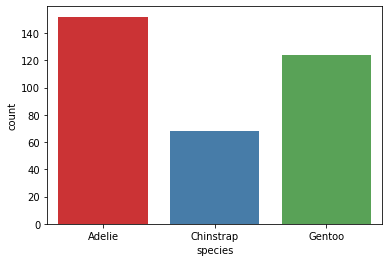

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df["species"],palette="Set1")

<AxesSubplot:>

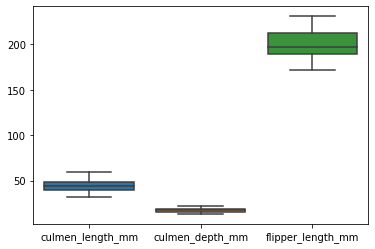

In [75]:
sns.boxplot(data = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']])

<AxesSubplot:>

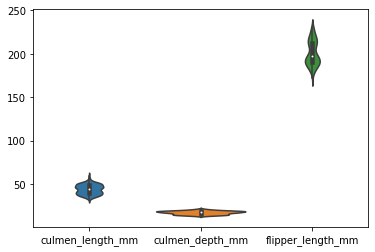

In [76]:
sns.violinplot(data = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']])

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


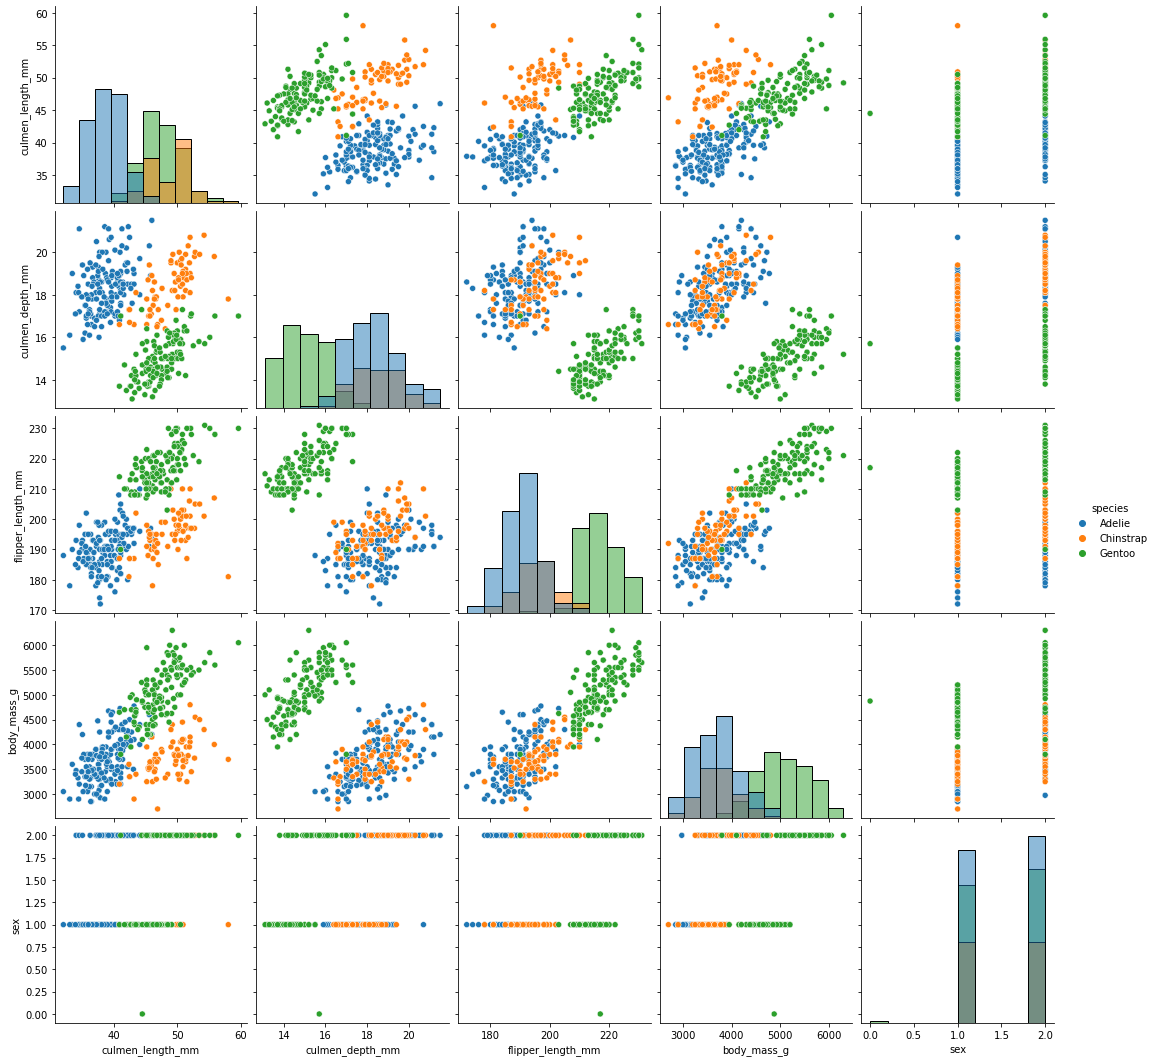

In [77]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


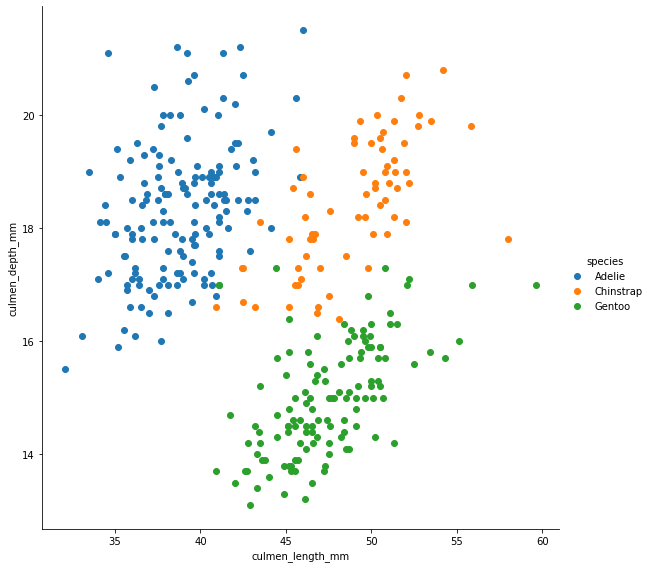

In [81]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


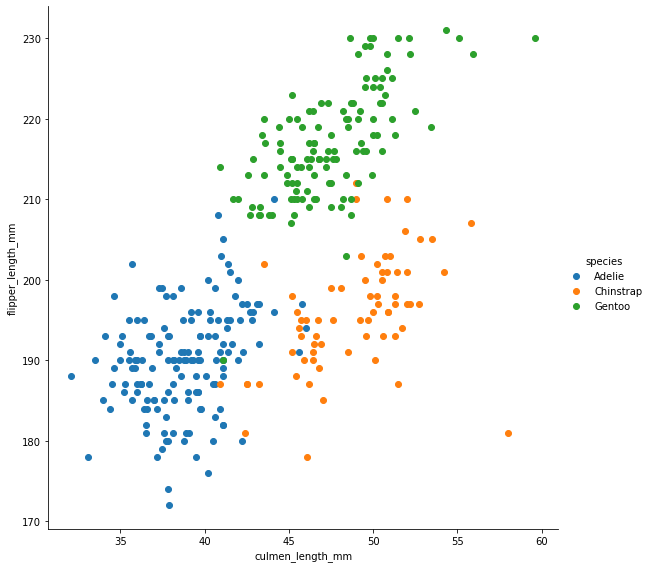

In [82]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

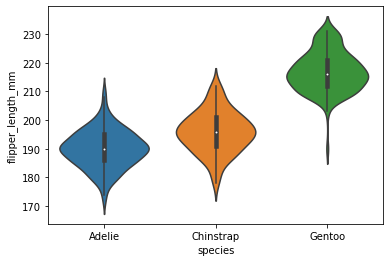

In [83]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


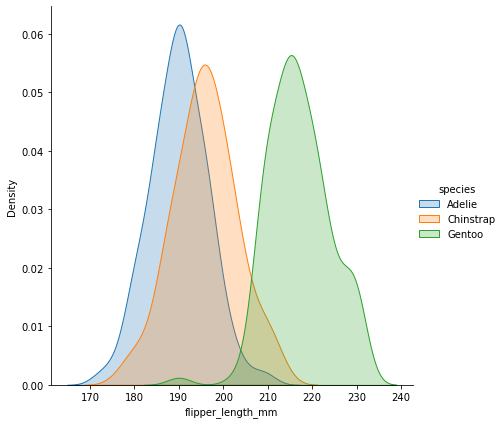

In [84]:
sns.FacetGrid(df, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

C:\Users\bmthm\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


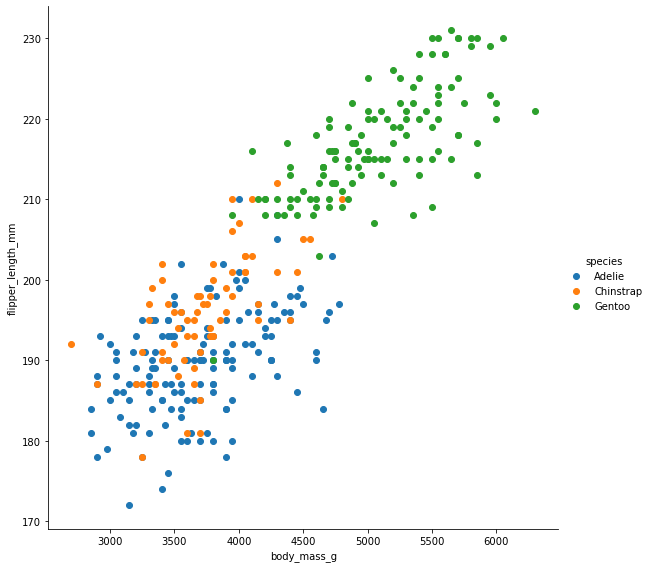

In [85]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

In [ ]:
#https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook#Reading-in-the-dataset
#https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:~:text=In%20simple%20words%2C%20both%20the,linear%20relationship%20between%20two%20variables.
#https://towardsdatascience.com/5-real-world-datasets-for-exploratory-data-analysis-21b7cc5afe7e
#https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:~:text=In%20simple%20words%2C%20both%20the,linear%20relationship%20between%20two%20variables.
#https://miykael.github.io/blog/2022/advanced_eda/
# Referal